In [78]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
df = pd.read_csv('./dataset/dataset.csv')

In [79]:
attr_map = {
    'AGE': {1: '18-21', 2: '22-25', 3: 'Above 26'},
    'GENDER': {1: 'Female', 2: 'Male'},
    'HS_TYPE': {1: 'Private', 2: 'State', 3: 'Other'},
    'SCHOLARSHIP': {1: 'None', 2: '25%', 3: '50%', 4: '75%', 5: 'Full'},
    'WORK': {1: 'Yes', 2: 'No'},
    'ACTIVITY': {1: 'Yes', 2: 'No'},
    'PARTNER': {1: 'Yes', 2: 'No'},
    'SALARY': {1: 'USD 135-200', 2: 'USD 201-270', 3: 'USD 271-340', 4: 'USD 341-410', 5: 'Above 410'},
    'TRANSPORT': {1: 'Bus', 2: 'Private car/taxi', 3: 'Bicycle', 4: 'Other'},
    'LIVING': {1: 'Rental', 2: 'Dormitory', 3: 'With family', 4: 'Other'},
    'MOTHER_EDU': {1: 'Primary school', 2: 'Secondary school', 3: 'High school', 4: 'University', 5: 'MSc.', 6: 'Ph.D.'},
    'FATHER_EDU': {1: 'Primary school', 2: 'Secondary school', 3: 'High school', 4: 'University', 5: 'MSc.', 6: 'Ph.D.'},
    '#_SIBLINGS': {1: '1', 2: '2', 3: '3', 4: '4', 5: '5 or above'},
    'KIDS': {1: 'Married', 2: 'Divorced', 3: 'Died - one of them or both'},
    'MOTHER_JOB': {1: 'Retired', 2: 'Housewife', 3: 'Government officer', 4: 'Private sector employee', 5: 'Self-employment', 6: 'Other'},
    'FATHER_JOB': {1: 'Retired', 2: 'Government officer', 3: 'Private sector employee', 4: 'Self-employment', 5: 'Other'},
    'STUDY_HRS': {1: 'None', 2: '<5 hours', 3: '6-10 hours', 4: '11-20 hours', 5: 'More than 20 hours'},
    'READ_FREQ': {1: 'None', 2: 'Sometimes', 3: 'Often'},
    'READ_FREQ_SCI': {1: 'None', 2: 'Sometimes', 3: 'Often'},
    'ATTEND_DEPT': {1: 'Yes', 2: 'No'},
    'IMPACT': {1: 'Positive', 2: 'Negative', 3: 'Neutral'},
    'ATTEND': {1: 'Always', 2: 'Sometimes', 3: 'Never'},
    'PREP_STUDY': {1: 'Alone', 2: 'With friends', 3: 'Not applicable'},
    'PREP_EXAM': {1: 'Closest date to the exam', 2: 'Regularly during the semester', 3: 'Never'},
    'NOTES': {1: 'Never', 2: 'Sometimes', 3: 'Always'},
    'LISTENS': {1: 'Never', 2: 'Sometimes', 3: 'Always'},
    'LIKES_DISCUSS': {1: 'Never', 2: 'Sometimes', 3: 'Always'},
    'CLASSROOM': {1: 'Not useful', 2: 'Useful', 3: 'Not applicable'},
    'CUML_GPA': {1: '<2.00', 2: '2.00-2.49', 3: '2.50-2.99', 4: '3.00-3.49', 5: 'Above 3.49'},
    'EXP_GPA': {1: '<2.00', 2: '2.00-2.49', 3: '2.50-2.99', 4: '3.00-3.49', 5: 'Above 3.49'},
    'COURSE_ID': None,  # Placeholder for Course ID (Assuming it's a numerical ID)
    'GRADE': {0: 'Fail', 1: 'DD', 2: 'DC', 3: 'CC', 4: 'CB', 5: 'BB', 6: 'BA', 7: 'AA'},
}


In [80]:
df.columns = [x for x in df.columns]
print(df.columns)
for col in df.columns.tolist():
    if col not in list(attr_map.keys()):
        print(col)
        continue
    if col == '#_SIBLINGS':
        df[col].apply(lambda x: '5 or above' if x == 5 else str(x))
    else:
        df[col] = df[col].map(attr_map[col])
        
df.head()

Index(['STUDENTID', 'AGE', 'GENDER', 'HS_TYPE', 'SCHOLARSHIP', 'WORK',
       'ACTIVITY', 'PARTNER', 'SALARY', 'TRANSPORT', 'LIVING', 'MOTHER_EDU',
       'FATHER_EDU', '#_SIBLINGS', 'KIDS', 'MOTHER_JOB', 'FATHER_JOB',
       'STUDY_HRS', 'READ_FREQ', 'READ_FREQ_SCI', 'ATTEND_DEPT', 'IMPACT',
       'ATTEND', 'PREP_STUDY', 'PREP_EXAM', 'NOTES', 'LISTENS',
       'LIKES_DISCUSS', 'CLASSROOM', 'CUML_GPA', 'EXP_GPA', 'COURSE ID',
       'GRADE'],
      dtype='object')
STUDENTID
COURSE ID


,STUDENTID,AGE,GENDER,HS_TYPE,SCHOLARSHIP,WORK,ACTIVITY,PARTNER,SALARY,TRANSPORT,LIVING,MOTHER_EDU,FATHER_EDU,#_SIBLINGS,KIDS,MOTHER_JOB,FATHER_JOB,STUDY_HRS,READ_FREQ,READ_FREQ_SCI,ATTEND_DEPT,IMPACT,ATTEND,PREP_STUDY,PREP_EXAM,NOTES,LISTENS,LIKES_DISCUSS,CLASSROOM,CUML_GPA,EXP_GPA,COURSE ID,GRADE
0,STUDENT125,18-21,Female,State,75%,Yes,Yes,Yes,USD 135-200,Bus,With family,Secondary school,High school,2,Married,Private sector employee,Private sector employee,11-20 hours,Sometimes,Sometimes,No,Positive,Always,With friends,Regularly during the semester,Always,Always,Sometimes,Not useful,2.50-2.99,2.50-2.99,9,CC
1,STUDENT126,18-21,Female,State,Full,Yes,Yes,No,USD 135-200,Bus,With family,Primary school,Primary school,5,Married,Housewife,Private sector employee,6-10 hours,Sometimes,Often,No,Positive,Always,Alone,Regularly during the semester,Always,Sometimes,Always,Not useful,<2.00,2.50-2.99,9,DC
2,STUDENT128,18-21,Female,State,75%,No,No,No,USD 135-200,Other,With family,High school,Secondary school,2,Married,Government officer,Self-employment,<5 hours,None,None,No,Positive,Always,Alone,Closest date to the exam,Always,Sometimes,Sometimes,Not useful,2.00-2.49,2.00-2.49,9,DD
3,STUDENT129,18-21,Female,State,75%,No,Yes,Yes,USD 135-200,Other,With family,High school,University,2,Married,Private sector employee,Government officer,<5 hours,None,None,No,Positive,Always,Alone,Closest date to the exam,Always,Sometimes,Sometimes,Not useful,2.00-2.49,2.00-2.49,9,Fail
4,STUDENT130,18-21,Female,State,50%,Yes,Yes,No,USD 135-200,Bus,Rental,Primary school,Primary school,3,Married,Housewife,Self-employment,11-20 hours,Sometimes,Often,No,Positive,Always,With friends,Regularly during the semester,Always,Sometimes,Always,Useful,2.00-2.49,2.50-2.99,9,CC


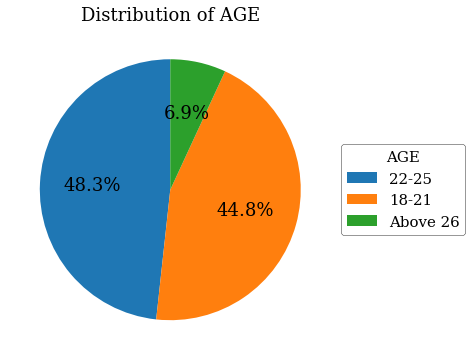

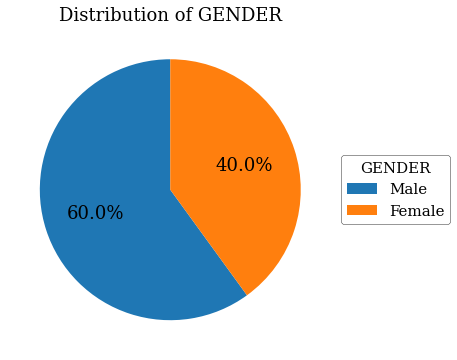

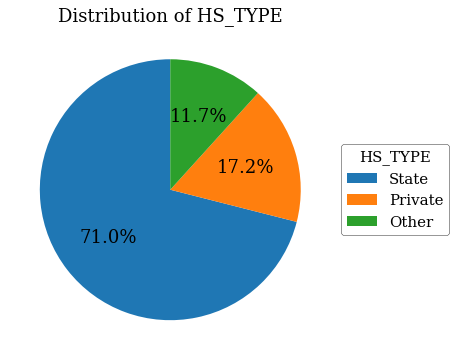

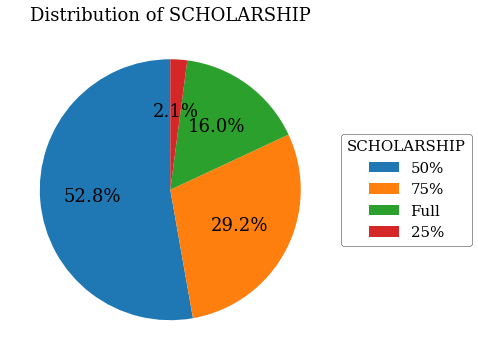

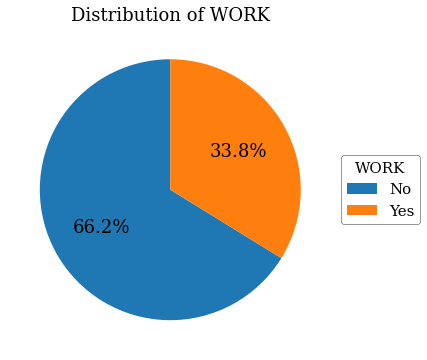

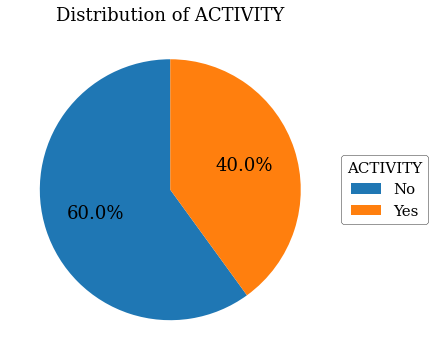

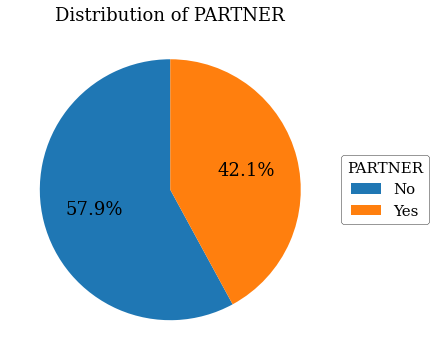

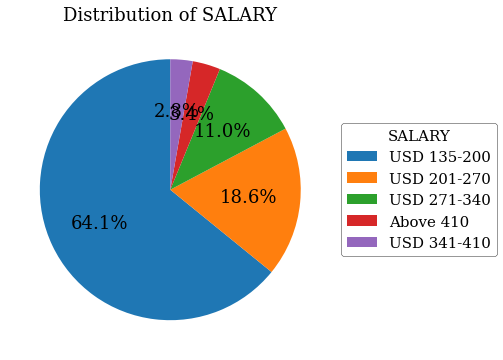

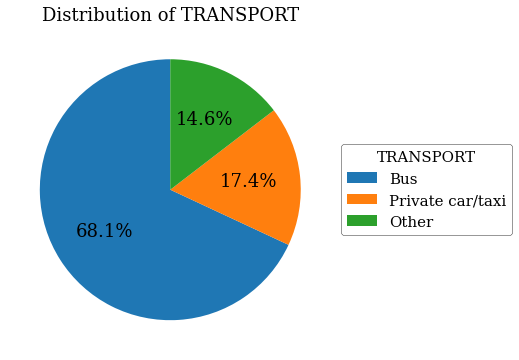

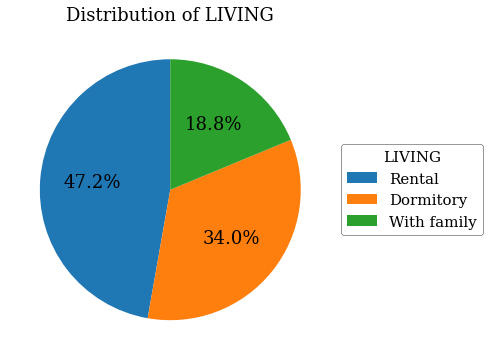

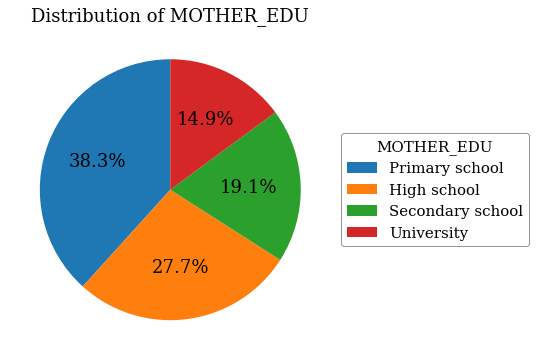

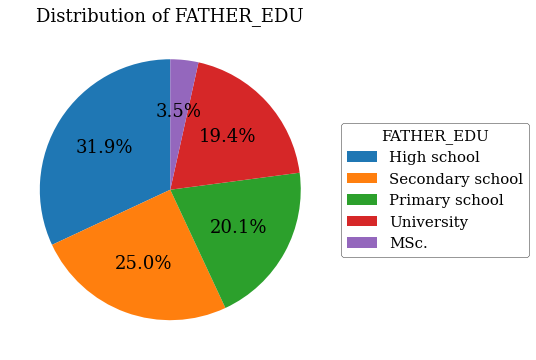

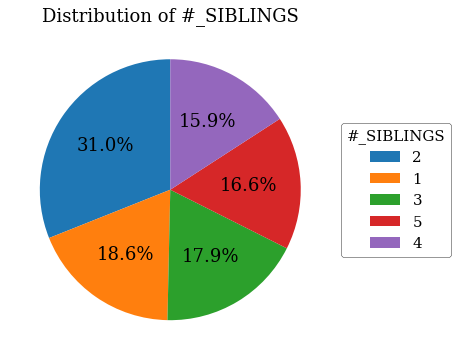

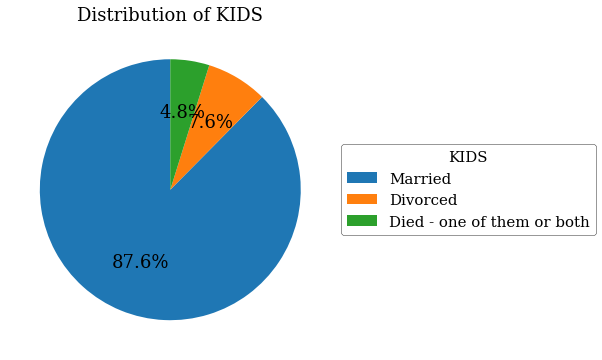

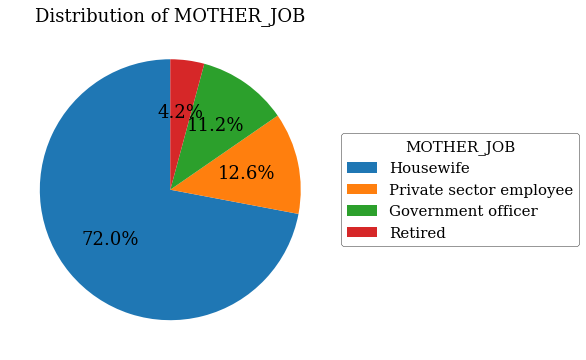

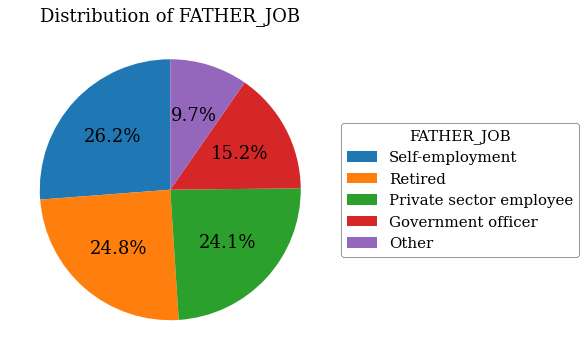

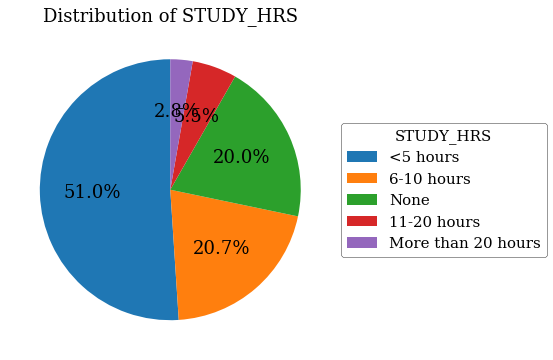

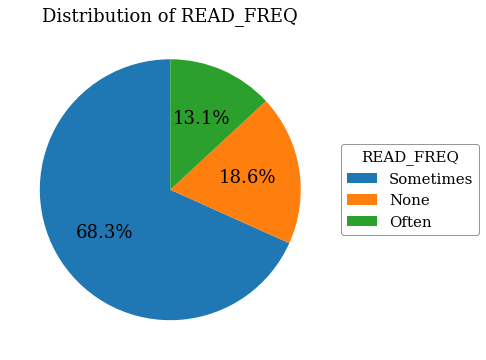

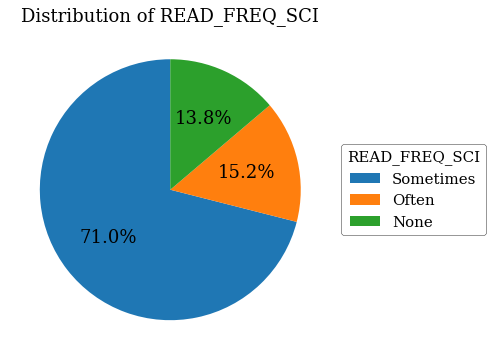

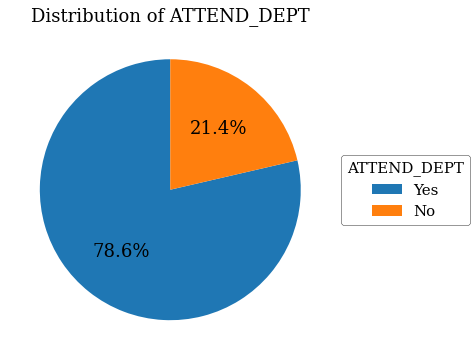

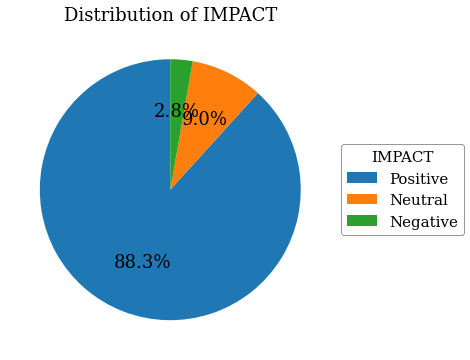

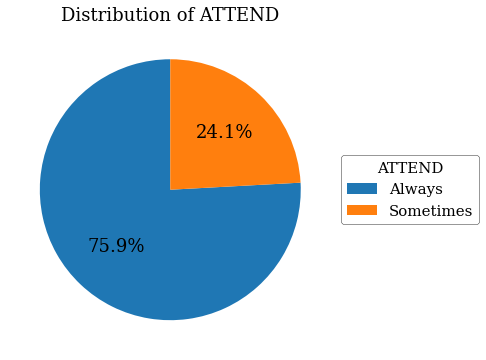

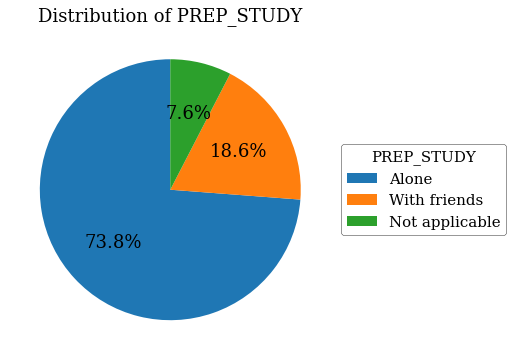

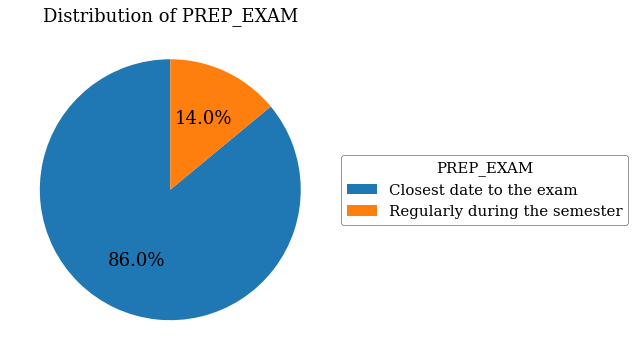

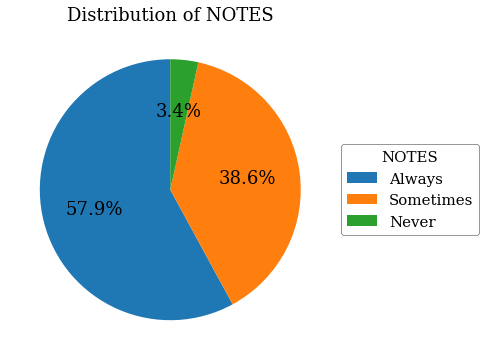

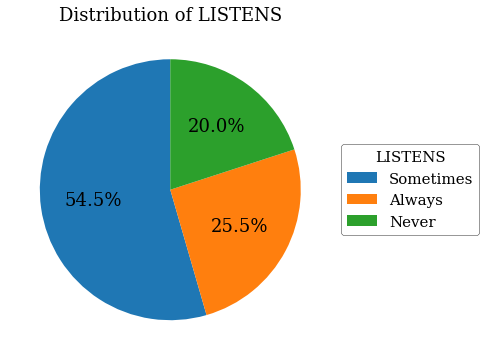

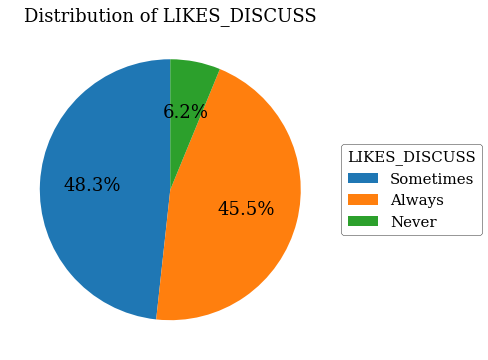

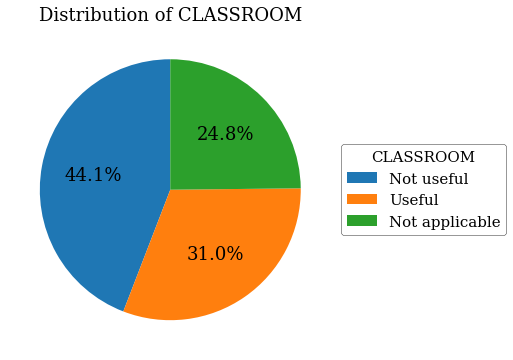

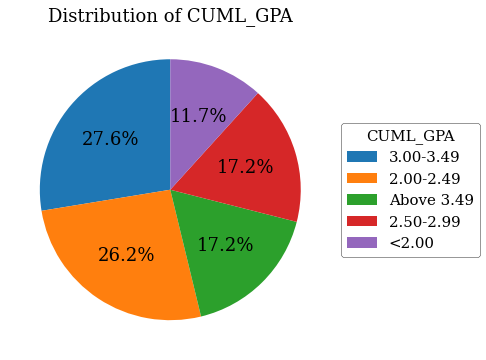

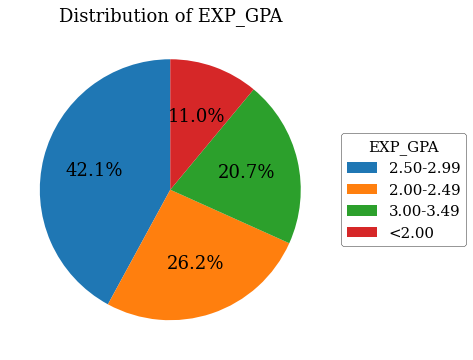

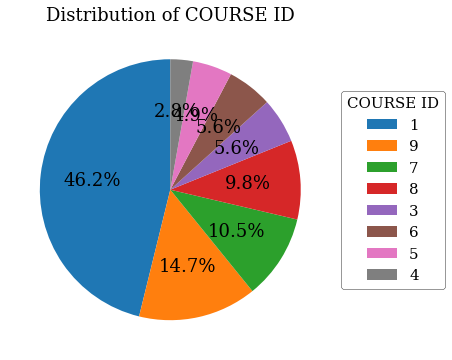

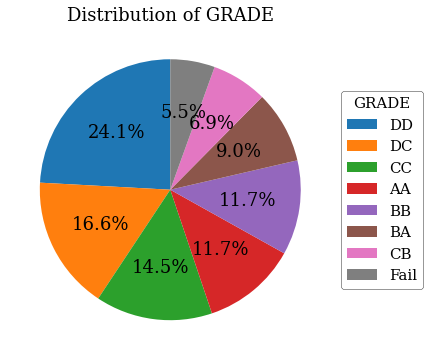

In [92]:
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 15, 'font.family': 'serif'})

for column in df.columns[1:]:
    labels = df[column].value_counts().index
    sizes = df[column].value_counts(normalize=True) * 100

    labels = labels[sizes > 2]
    sizes = sizes[sizes > 2]

    if len(labels) > 0:
        fig, ax = plt.subplots(figsize=(6, 6))
        wedges, texts, autotexts = ax.pie(
            sizes,
            labels=None,  
            autopct=lambda p: '{:.1f}%'.format(p) if p > 2 else '',
            startangle=90
        )

        for text in autotexts:
            text.set_fontsize(18)

        ax.legend(wedges, labels, title=column, loc="center left", bbox_to_anchor=(1, 0.5), fontsize=15)

        legend = ax.get_legend()
        legend.get_frame().set_linewidth(0.5)
        legend.get_frame().set_edgecolor('black')

        plt.title(f"Distribution of {column}")
        plt.show()
